### For attempting to perform hierarchical clustering on the 10 neurons

In [3]:
#import statements

import os
import re

import pandas as pd
import matplotlib as plt
from sklearn.cluster import AgglomerativeClustering

import Neuron_analysis as na

import plotly.graph_objects as go
import plotly.figure_factory as ff

In [1]:
#define useful functions

def find_mousename(text):
    #finds name of mouse that follows the typical LSENS pattern: two letters followed by 3 numbers, ie AL000
    a= re.search('[a-zA-Z]{2}[0-9]{2,3}', text)
    return a[0]

def prep_df(df):
    # prepares df so that we only keep the id and total count
    # input is the full path and name of the .csv file
    read_file= pd.read_excel(df)
    
    #new= read_file.set_index('id').sort_values(by='graph_order').T
    #This lines sorts the region ids according to its graph order, such that related regions are ordered together 
    # ie, barrel field layers are grouped together
    # Note that this order would be disrupted when you have to later concatenate dfs with different columns...so need to rearrange later
    
    
    new= read_file.set_index('acronym').T
    new_series=new.loc['Total_counts']

    full_df= new_series.to_frame()
    full_df.rename(columns={'Total_counts': find_mousename(df)}, inplace=1)
    return full_df

def combine_df(folder,list_of_fname,inner=False):
    # combine multiple data frames, keeping only mouse name, region id and amount of um
    # by default, returns all of the regions that at least one brain that projects to it
    # if inner=True, then only return regions that overlaps in all brains
    
    #initialize a dataframe which will later be removed
    full_name_initial=os.path.join(folder, list_of_fname[0])
    full_df=prep_df(full_name_initial)
    
    if inner==True:
        for i in (list_of_fname):
            new_df=prep_df(os.path.join(folder, i))
            full_df=full_df=pd.concat([full_df, new_df],axis=1, join='inner')

    else: 
        for i in (list_of_fname):
            new_df=prep_df(os.path.join(folder, i))
            full_df=full_df=pd.concat([full_df, new_df],axis=1)

    full_df=full_df.T.iloc[1:]
    return full_df

def sort_id(df):
    #pick out id that are present in the df and sort them by graph order
    #this puts relevant regions together(ie, all layers of S1bf will be together, etc)
    atlas_ref=na.atlas_labels[na.atlas_labels['id'].isin(df.columns)]
    sorted_id=[x for _,x in sorted(zip(atlas_ref['graph_order'],atlas_ref['id']))]
    return sorted_id

In [4]:
#find all relevant files
folder= 'M:\\analysis\Yanqi_Liu\Complete_points'
files= [ i for i  in os.listdir(folder) if 'with_counts' in i]
parent_axons= [ i for i  in os.listdir(folder) if 'parent' in i]

## load all dendrite and axonal csv files

In [4]:
dendrite_files= [i for i in files if 'dendrite' in i]
# identify files with dendritic information
# start testing with dendrites since they are less complicated 
dendrite_df= combine_df(folder, dendrite_files)
dendrite_df

acronym  SSp-bfd1  SSp-bfd2/3
AL066        5875        4300
AL080        5611        2235
AL092        5617        2358
AL110        5742        2324
AL126        6842        1325
AL131        3790        3542
AL140        5749        2496
AL142        6465          41
AL157        3157        3409
GF243        2712        4029

In [19]:
dendrite_df.columns.to_list()

['SSp-bfd1', 'SSp-bfd2/3']

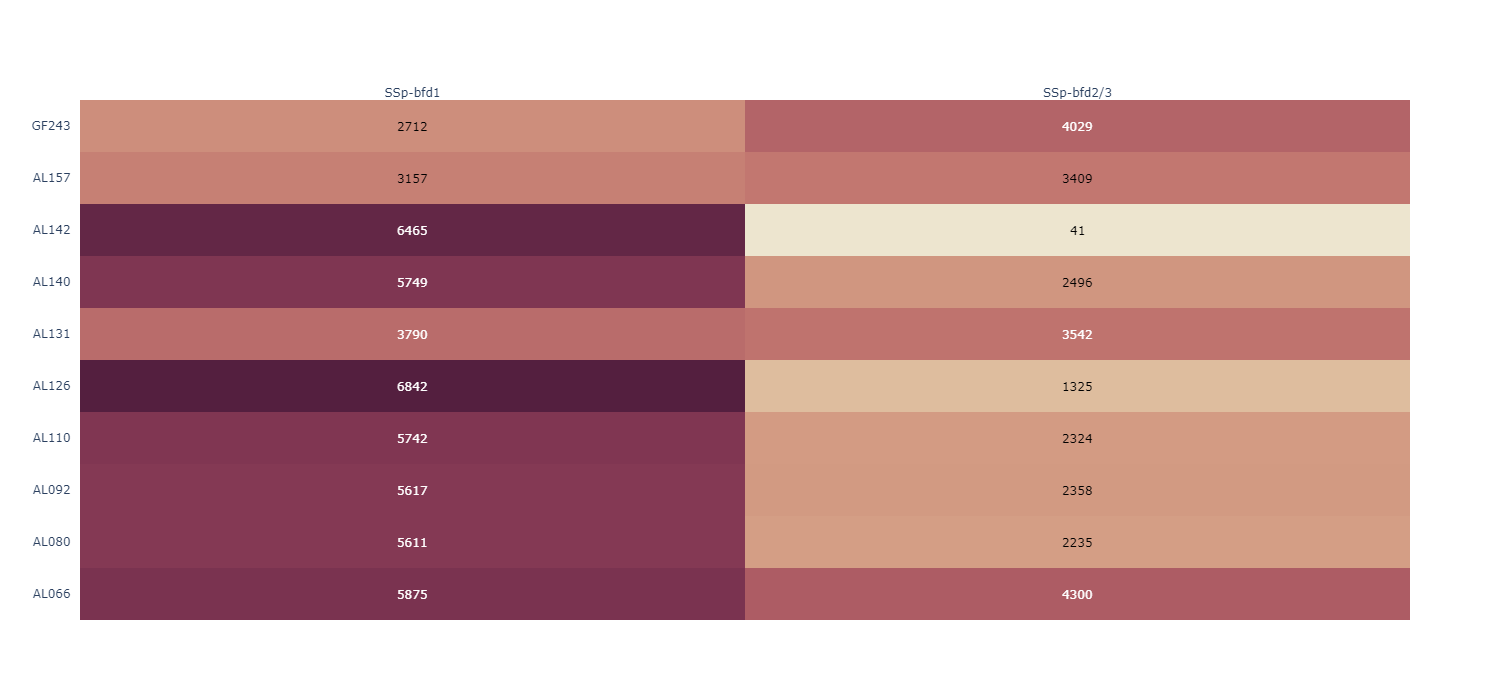

In [141]:
#Plot dendrite informations using annotated heat maps

str_id= dendrite_df.columns.to_list()

z =dendrite_df.values

fig = ff.create_annotated_heatmap(z, colorscale='Brwnyl',
                                  x=str_id,y=list(dendrite_df.index))
fig.update_xaxes(showticklabels=True,
                type='category')

fig.update_layout(
    width = 700, height = 700,
    autosize = True
)

fig.show()
fig.write_image("fig1.svg")

#some how dendrite_df.index must be put into a list first

In [87]:
# adds a final column of total dendrite lengthj 
dendrite_df['Total'] = dendrite_df.sum(axis=1)
dendrite_df

acronym  SSp-bfd1  SSp-bfd2/3  Total
AL066        5875        4300  10175
AL080        5611        2235   7846
AL092        5617        2358   7975
AL110        5742        2324   8066
AL126        6842        1325   8167
AL131        3790        3542   7332
AL140        5749        2496   8245
AL142        6465          41   6506
AL157        3157        3409   6566
GF243        2712        4029   6741

In [88]:
dendrite_df.to_excel('dendrite_df.xls')
# save as excel

## now for axons

In [5]:
axonal_df= combine_df(folder, parent_axons)

#axonal_df.fillna(0, inplace=True)
#fill  nan values with 0 only for subsequent clustering step
# keep Nan for heatmap display purposes

C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [6]:
axonal_df.sort_index(axis=1)


AUDd AUDpo  MOp   MOs RSPagl RSPv SSp-bfd SSp-ll SSp-n SSp-tr  ...  \
AL066  784   501  NaN   NaN    NaN    5   56951    NaN   NaN   1826  ...   
AL080  NaN   NaN  NaN   NaN    NaN  NaN   48801    NaN   NaN    685  ...   
AL092   51   NaN  405   NaN    253  NaN   45416    114   NaN   1088  ...   
AL110  NaN   NaN  NaN   NaN    NaN  NaN   58146    NaN   NaN    NaN  ...   
AL126  NaN   NaN  902  2575    NaN  NaN   43391   1497   NaN   3991  ...   
AL131  NaN   NaN  NaN   NaN    NaN  NaN   49214    NaN   295    173  ...   
AL140  204   NaN  365   NaN    NaN  NaN   44847    399   NaN    816  ...   
AL142  NaN   NaN  NaN   NaN    NaN  NaN   39798    NaN   NaN    286  ...   
AL157  NaN   NaN  NaN   NaN    NaN  NaN   31176     14   NaN     13  ...   
GF243  NaN   NaN  NaN   NaN    NaN  NaN   47660    NaN   NaN   2976  ...   

       VISp VISpm VISrl    cc   fa fiber tracts  fxs   hc  mfbc    st  
AL066  1233  1679  2838  4998  NaN          NaN   47  289  1158  1110  
AL080   760   NaN  5137   734  NaN           81  NaN  NaN    93  1043  
AL092   NaN   NaN  3129   NaN  NaN          NaN  NaN  NaN   NaN   NaN  
AL110   NaN   NaN   NaN   NaN  NaN           98  NaN  NaN   NaN   NaN  
AL126   NaN   NaN   NaN    78  NaN          NaN  NaN  NaN   896   NaN  
AL131   NaN   NaN  3235  5697  NaN         1540  100  NaN   NaN   502  
AL140   NaN   NaN  1795   614  NaN          568  NaN  NaN   NaN  3397  
AL142   NaN   NaN   763   NaN  149          NaN  NaN  NaN   NaN   NaN  
AL157   NaN   NaN   NaN  6166  NaN          644  NaN  NaN   NaN   NaN  
GF243   NaN   NaN   339   236  NaN          983  NaN  NaN   393   459  

[10 rows x 28 columns]

In [7]:
new_colorder= axonal_df.sum()
# new column order would be the region with greatest amount goes first, ie: bfd, trunk, visc, etc

In [8]:
new_colorder.sort_values(ascending=False, inplace=True)

In [9]:
new_colorder.index

Index(['SSp-bfd', 'SSp-ul', 'VISa', 'SSs', 'SSp-un', 'cc', 'VISrl', 'SSp-tr',
       'VISal', 'VISam', 'st', 'STRd', 'fiber tracts', 'MOs', 'mfbc', 'SSp-ll',
       'VISp', 'VISpm', 'MOp', 'AUDd', 'VISC', 'AUDpo', 'SSp-n', 'hc',
       'RSPagl', 'fa', 'fxs', 'RSPv'],
      dtype='object')

In [10]:
axonal_df=axonal_df[new_colorder.index]
axonal_df

SSp-bfd SSp-ul   VISa    SSs SSp-un    cc VISrl SSp-tr VISal VISam  ...  \
AL066   56951    NaN  18794    758    NaN  4998  2838   1826  3907  5287  ...   
AL080   48801    NaN   2282   3727     60   734  5137    685   NaN  1757  ...   
AL092   45416   6950   4862   2313   3326   NaN  3129   1088  1050   477  ...   
AL110   58146    NaN    NaN  12202    205   NaN   NaN    NaN   NaN   NaN  ...   
AL126   43391  11175    NaN    NaN   5295    78   NaN   3991   NaN   NaN  ...   
AL131   49214     35   1320    NaN     87  5697  3235    173  3082   NaN  ...   
AL140   44847   2484   1550   2366    778   614  1795    816   122   NaN  ...   
AL142   39798    NaN   2617   2721   1411   NaN   763    286   NaN   NaN  ...   
AL157   31176  18003    NaN    NaN   7520  6166   NaN     13   NaN   NaN  ...   
GF243   47660     35   3173    NaN   3855   236   339   2976   NaN   NaN  ...   

       MOp AUDd VISC AUDpo SSp-n   hc RSPagl   fa  fxs RSPv  
AL066  NaN  784  NaN   501   NaN  289    NaN  NaN   47    5  
AL080  NaN  NaN  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  
AL092  405   51  NaN   NaN   NaN  NaN    253  NaN  NaN  NaN  
AL110  NaN  NaN  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  
AL126  902  NaN  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  
AL131  NaN  NaN  NaN   NaN   295  NaN    NaN  NaN  100  NaN  
AL140  365  204  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  
AL142  NaN  NaN  905   NaN   NaN  NaN    NaN  149  NaN  NaN  
AL157  NaN  NaN  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  
GF243  NaN  NaN  NaN   NaN   NaN  NaN    NaN  NaN  NaN  NaN  

[10 rows x 28 columns]

In [12]:
# create a final row of averages
import numpy as np
average= axonal_df.sum()/10
avg=average.to_numpy()

avg=np.reshape(avg,(1,28))
avg.shape

df_average = pd.DataFrame(avg, columns=axonal_df.columns, index=['Average'])
df_average

SSp-bfd  SSp-ul    VISa     SSs  SSp-un      cc   VISrl  SSp-tr  \
Average  46540.0  3868.2  3459.8  2408.7  2253.7  1852.3  1723.6  1185.4   

         VISal  VISam  ...    MOp   AUDd  VISC  AUDpo  SSp-n    hc  RSPagl  \
Average  816.1  752.1  ...  167.2  103.9  90.5   50.1   29.5  28.9    25.3   

           fa   fxs  RSPv  
Average  14.9  14.7   0.5  

[1 rows x 28 columns]

In [13]:
final= axonal_df.append(df_average)

In [14]:
final.to_excel('axonal_df_parent.xls')

In [15]:
final=final[::-1] 
# so that average row shows up last when plotting

In [16]:
final

SSp-bfd  SSp-ul    VISa     SSs  SSp-un      cc   VISrl  SSp-tr  \
Average   46540  3868.2  3459.8  2408.7  2253.7  1852.3  1723.6  1185.4   
GF243     47660      35    3173     NaN    3855     236     339    2976   
AL157     31176   18003     NaN     NaN    7520    6166     NaN      13   
AL142     39798     NaN    2617    2721    1411     NaN     763     286   
AL140     44847    2484    1550    2366     778     614    1795     816   
AL131     49214      35    1320     NaN      87    5697    3235     173   
AL126     43391   11175     NaN     NaN    5295      78     NaN    3991   
AL110     58146     NaN     NaN   12202     205     NaN     NaN     NaN   
AL092     45416    6950    4862    2313    3326     NaN    3129    1088   
AL080     48801     NaN    2282    3727      60     734    5137     685   
AL066     56951     NaN   18794     758     NaN    4998    2838    1826   

         VISal  VISam  ...    MOp   AUDd  VISC AUDpo SSp-n    hc RSPagl    fa  \
Average  816.1  752.1  ...  167.2  103.9  90.5  50.1  29.5  28.9   25.3  14.9   
GF243      NaN    NaN  ...    NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   
AL157      NaN    NaN  ...    NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   
AL142      NaN    NaN  ...    NaN    NaN   905   NaN   NaN   NaN    NaN   149   
AL140      122    NaN  ...    365    204   NaN   NaN   NaN   NaN    NaN   NaN   
AL131     3082    NaN  ...    NaN    NaN   NaN   NaN   295   NaN    NaN   NaN   
AL126      NaN    NaN  ...    902    NaN   NaN   NaN   NaN   NaN    NaN   NaN   
AL110      NaN    NaN  ...    NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   
AL092     1050    477  ...    405     51   NaN   NaN   NaN   NaN    253   NaN   
AL080      NaN   1757  ...    NaN    NaN   NaN   NaN   NaN   NaN    NaN   NaN   
AL066     3907   5287  ...    NaN    784   NaN   501   NaN   289    NaN   NaN   

          fxs RSPv  
Average  14.7  0.5  
GF243     NaN  NaN  
AL157     NaN  NaN  
AL142     NaN  NaN  
AL140     NaN  NaN  
AL131     100  NaN  
AL126     NaN  NaN  
AL110     NaN  NaN  
AL092     NaN  NaN  
AL080     NaN  NaN  
AL066      47    5  

[11 rows x 28 columns]

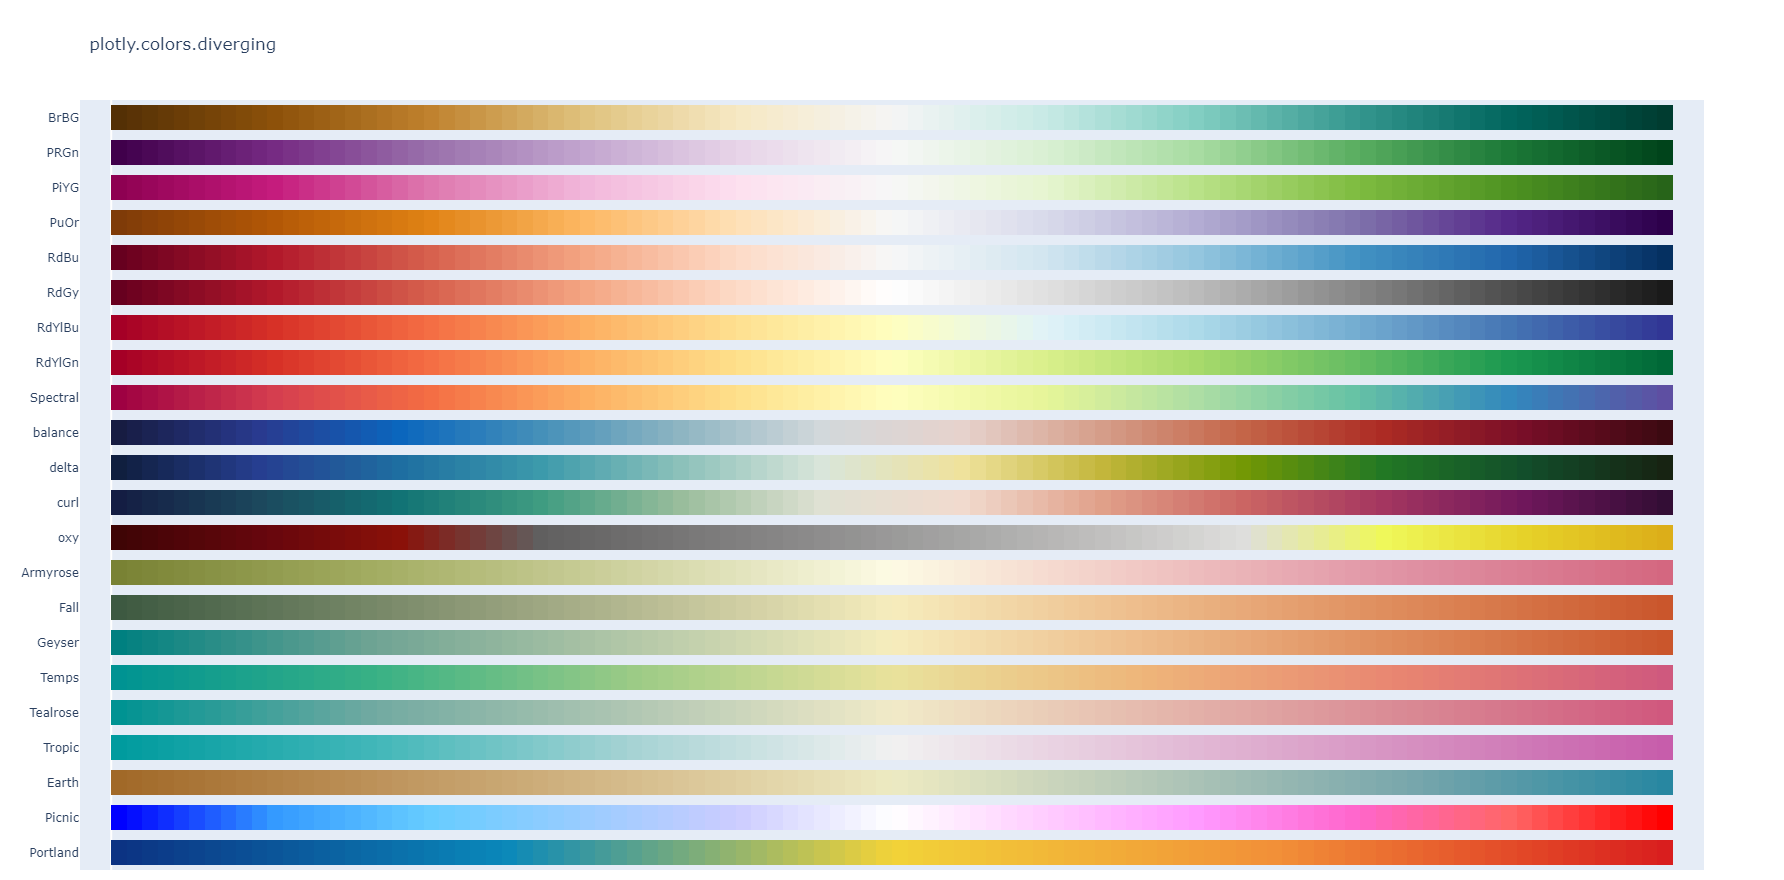

In [30]:
# colour bar

import plotly.express as px

fig=px.colors.diverging.swatches_continuous()
fig.show()
fig.write_image("legend.svg")

In [17]:
x=final.columns.to_list()
y=final.index.to_list()

In [18]:
full_name=[]
for i in x:
    name=na.atlas_labels.query(f"acronym== '{i}'").name.values[0]
    full_name.append(name)

In [19]:
parent_acronyms= {'Acronyms': x, 'Full name': full_name}
acronym_df= pd.DataFrame(data=parent_acronyms)

In [20]:
acronym_df.to_excel('acronym_parent.xls')

C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


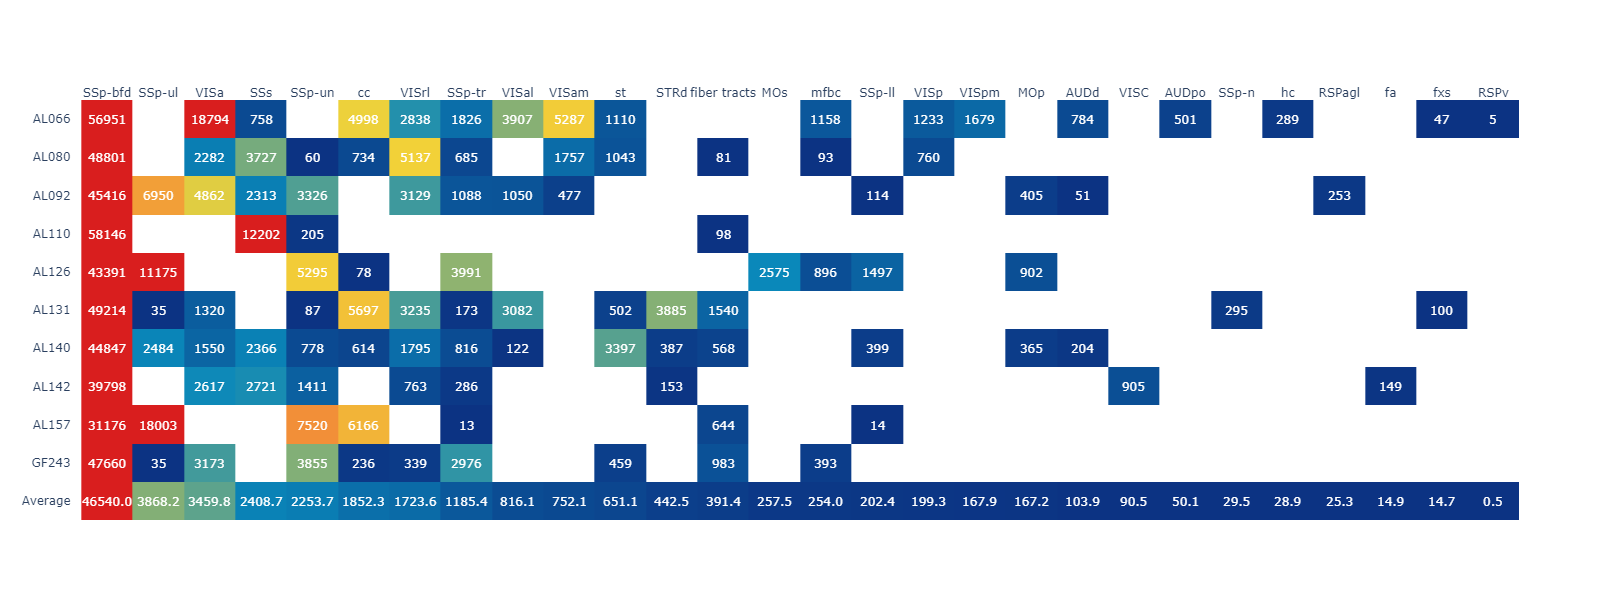

In [21]:

fig = ff.create_annotated_heatmap(z=final.values, 
                                  colorscale='Portland',
                                  font_colors=['white'],
                                  zmax= 10000,
                                  zmin=100,
                                  y=y,
                                  x=x,
                                  hoverongaps = False,
                                  text=full_name
                                 )
fig.update_xaxes(visible=True, showgrid=False)
fig.update_yaxes(visible=True, showgrid=False)

fig.update_layout(
    width = 2000, height = 600,
    autosize = True,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

fig.write_image("fig1.svg")

C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning:

invalid value encountered in reduce



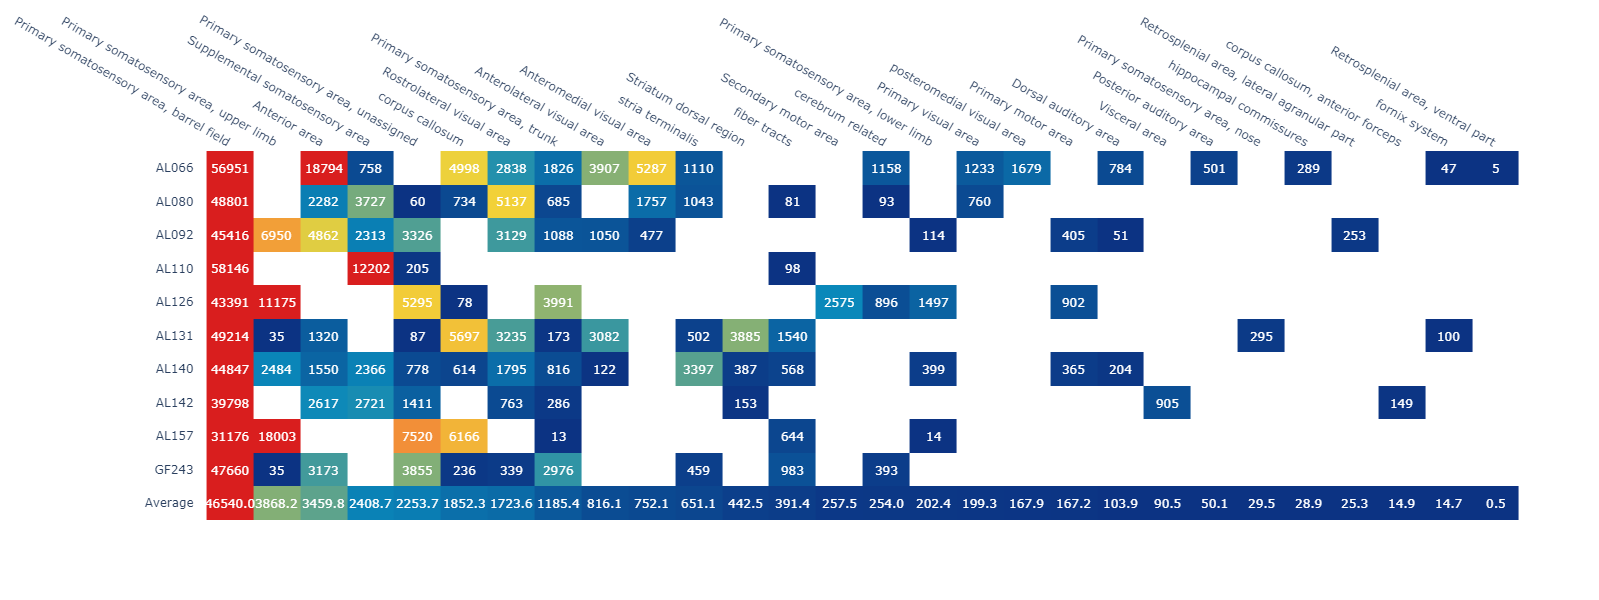

In [22]:

fig = ff.create_annotated_heatmap(z=final.values, 
                                  zmin=100,
                                  zmax=10000,
                                  colorscale='Portland',
                                  y=y,
                                  x=full_name,
                                  hoverongaps = False,
                                  text=full_name
                                 )
fig.update_xaxes(visible=True, showgrid=False)
fig.update_yaxes(visible=True, showgrid=False)

fig.update_layout(
    width = 2000, height = 600,
    autosize = True,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

fig.write_image("fig2.svg")

### generate big excel file with all neurons with specific layers for regions (not bundled up by parent)

In [23]:
axon_files= [i for i in files if 'axon' in i]
axonal_df= combine_df(folder, axon_files)
axonal_df.sort_index(axis=1)
axonal_df

C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




AUDd2/3  AUDd4  AUDd5  AUDd6b  AUDpo1  AUDpo2/3      CP   MOp5  MOp6a  \
AL066    481.0  177.0  126.0     NaN   343.0     158.0     NaN    NaN    NaN   
AL080      NaN    NaN    NaN     NaN     NaN       NaN     NaN    NaN    NaN   
AL092      NaN    NaN   51.0     NaN     NaN       NaN     NaN  405.0    NaN   
AL110      NaN    NaN    NaN     NaN     NaN       NaN     NaN    NaN    NaN   
AL126      NaN    NaN    NaN     NaN     NaN       NaN     NaN    NaN  479.0   
AL131      NaN    NaN    NaN     NaN     NaN       NaN  3885.0    NaN    NaN   
AL140      NaN    NaN    NaN   204.0     NaN       NaN   387.0  266.0   99.0   
AL142      NaN    NaN    NaN     NaN     NaN       NaN   153.0    NaN    NaN   
AL157      NaN    NaN    NaN     NaN     NaN       NaN     NaN    NaN    NaN   
GF243      NaN    NaN    NaN     NaN     NaN       NaN     NaN    NaN    NaN   

       MOp6b  ...  VISrl6b    alv     ccb     ccs    cing    dhc     ec  \
AL066    NaN  ...     74.0   47.0     NaN  4228.0  1158.0  289.0    NaN   
AL080    NaN  ...      NaN    NaN     NaN   734.0    93.0    NaN    NaN   
AL092    NaN  ...      NaN    NaN     NaN     NaN     NaN    NaN    NaN   
AL110    NaN  ...      NaN    NaN     NaN     NaN     NaN    NaN    NaN   
AL126  423.0  ...      NaN    NaN    78.0     NaN   896.0    NaN    NaN   
AL131    NaN  ...      NaN  100.0  5697.0     NaN     NaN    NaN    NaN   
AL140    NaN  ...      NaN    NaN     NaN   614.0     NaN    NaN    NaN   
AL142    NaN  ...      NaN    NaN     NaN     NaN     NaN    NaN  149.0   
AL157    NaN  ...      NaN    NaN  6166.0     NaN     NaN    NaN    NaN   
GF243    NaN  ...      NaN    NaN   236.0     NaN   393.0    NaN    NaN   

          fp    scwm     stc  
AL066  770.0     NaN  1110.0  
AL080    NaN    81.0  1043.0  
AL092    NaN     NaN     NaN  
AL110    NaN    98.0     NaN  
AL126    NaN     NaN     NaN  
AL131    NaN  1540.0   502.0  
AL140    NaN   568.0  3397.0  
AL142    NaN     NaN     NaN  
AL157    NaN   644.0     NaN  
GF243    NaN   983.0   459.0  

[10 rows x 89 columns]

In [24]:
new_colorder= axonal_df.sum()
new_colorder.sort_values(ascending=False, inplace=True)
new_colorder.index


Index(['SSp-bfd1', 'SSp-bfd2/3', 'SSp-bfd5', 'SSp-bfd4', 'SSp-bfd6a',
       'SSp-ul2/3', 'VISa2/3', 'ccb', 'VISa5', 'SSp-ul5', 'VISrl5', 'SSs2/3',
       'SSp-un5', 'SSp-ul4', 'stc', 'ccs', 'SSp-un1', 'VISa1', 'SSs6a',
       'SSp-tr5', 'SSs5', 'SSs1', 'CP', 'SSp-un2/3', 'VISrl1', 'scwm',
       'SSp-ul6a', 'VISam2/3', 'VISal2/3', 'VISam5', 'SSp-un4', 'SSp-ul1',
       'MOs6a', 'cing', 'SSp-tr1', 'VISa4', 'SSs4', 'SSp-un6a', 'SSp-bfd6b',
       'VISal1', 'VISrl2/3', 'VISal5', 'SSp-tr6a', 'SSp-ll6a', 'VISrl4',
       'VISa6a', 'VISrl6a', 'SSp-tr2/3', 'VISp6a', 'VISal4', 'VISpm2/3',
       'SSp-tr4', 'fp', 'VISp5', 'VISam6a', 'MOp5', 'MOp6a', 'VISC6a', 'SSs6b',
       'AUDd2/3', 'VISam4', 'MOp6b', 'SSp-tr6b', 'AUDpo1', 'VISC6b', 'VISpm6a',
       'dhc', 'SSp-un6b', 'RSPagl5', 'SSp-n6a', 'AUDd6b', 'VISpm4', 'AUDd4',
       'AUDd5', 'AUDpo2/3', 'VISam1', 'ec', 'alv', 'VISpm5', 'SSp-ll4',
       'VISpm1', 'SSp-ll5', 'VISrl6b', 'SSp-ul6b', 'VISa6b', 'SSp-n6b',
       'MOs6b', 'SSp-ll2/3', '

In [25]:
axonal_df=axonal_df[new_colorder.index]
axonal_df
axonal_df.to_excel('axonal_df.xls')

In [26]:
x=axonal_df.columns.to_list()
full_name=[]
for i in x:
    name=na.atlas_labels.query(f"acronym== '{i}'").name.values[0]
    full_name.append(name)


In [27]:
parent_acronyms= {'Acronyms': x, 'Full name': full_name}
acronym_df= pd.DataFrame(data=parent_acronyms)
acronym_df.to_excel('acronym_specific.xls')

## Now prepare data for axons

## Try clustering 
Some reference: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering 


C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



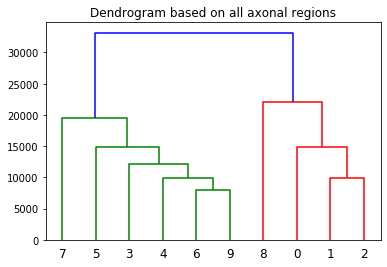

In [129]:
#try on all axonal regions
npdf=axonal_df.to_numpy()
distance_matrix = linkage(npdf, method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on all axonal regions')
plt.show()


In [87]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(npdf)

In [88]:
y_hc

array([1, 1, 1, 0, 0, 0, 0, 3, 2, 0], dtype=int64)

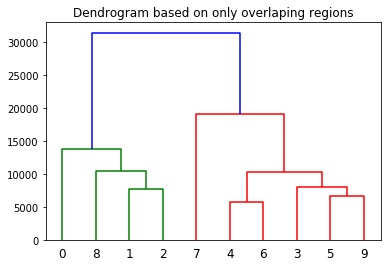

In [89]:
#try on only overlapping axonal regions, for simplicity and practicing purpose

npdf=axonal_df_inner.to_numpy()
distance_matrix = linkage(npdf, method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on only overlaping regions')
plt.show()

In [90]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(npdf)
y_hc

array([3, 0, 0, 1, 1, 1, 1, 2, 0, 1], dtype=int64)

In [21]:
axonal_df.index

Index(['AL066', 'AL080', 'AL092', 'AL110', 'AL126', 'AL131', 'AL140', 'AL142',
       'AL157', 'GF243'],
      dtype='object')

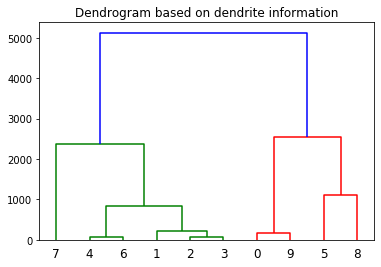

In [8]:
#Try on dendiritic informations
npdf=dendrite_df.to_numpy()
distance_matrix = linkage(npdf, method = 'complete', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on dendrite information')
plt.show()

In [9]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit_predict(npdf)
y_hc

array([3, 1, 1, 1, 1, 0, 1, 2, 0, 3], dtype=int64)

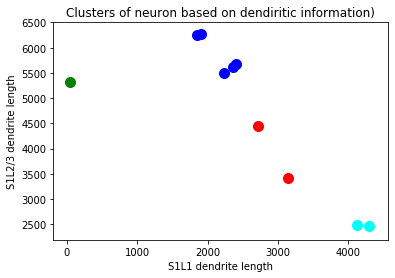

In [10]:
plt.scatter(npdf[y_hc==0, 0], npdf[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(npdf[y_hc==1, 0], npdf[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(npdf[y_hc==2, 0], npdf[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(npdf[y_hc==3, 0], npdf[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.title('Clusters of neuron based on dendiritic information)')
plt.xlabel('S1L1 dendrite length')
plt.ylabel('S1L2/3 dendrite length')
plt.show()
# Note,npdf[y_hc==0, 1] that ,1 shows the second item of each matching item(==0). Nice way of indexing

In [42]:
dendrite_df['cluster']=y_hc
#assign cluster group to each brain

In [43]:
dendrite_df.sort_values(['cluster'], inplace=True)

In [44]:
dendrite_df

id      201   981  cluster
AL126  1843  6255        0
AL066  4300  2461        0
AL157  3147  3419        1
AL080  2235  5508        1
AL092  2358  5617        1
AL110  2399  5667        1
AL140  1903  6280        1
AL142    47  5323        2
AL131  2722  4452        3
GF243  4130  2483        3

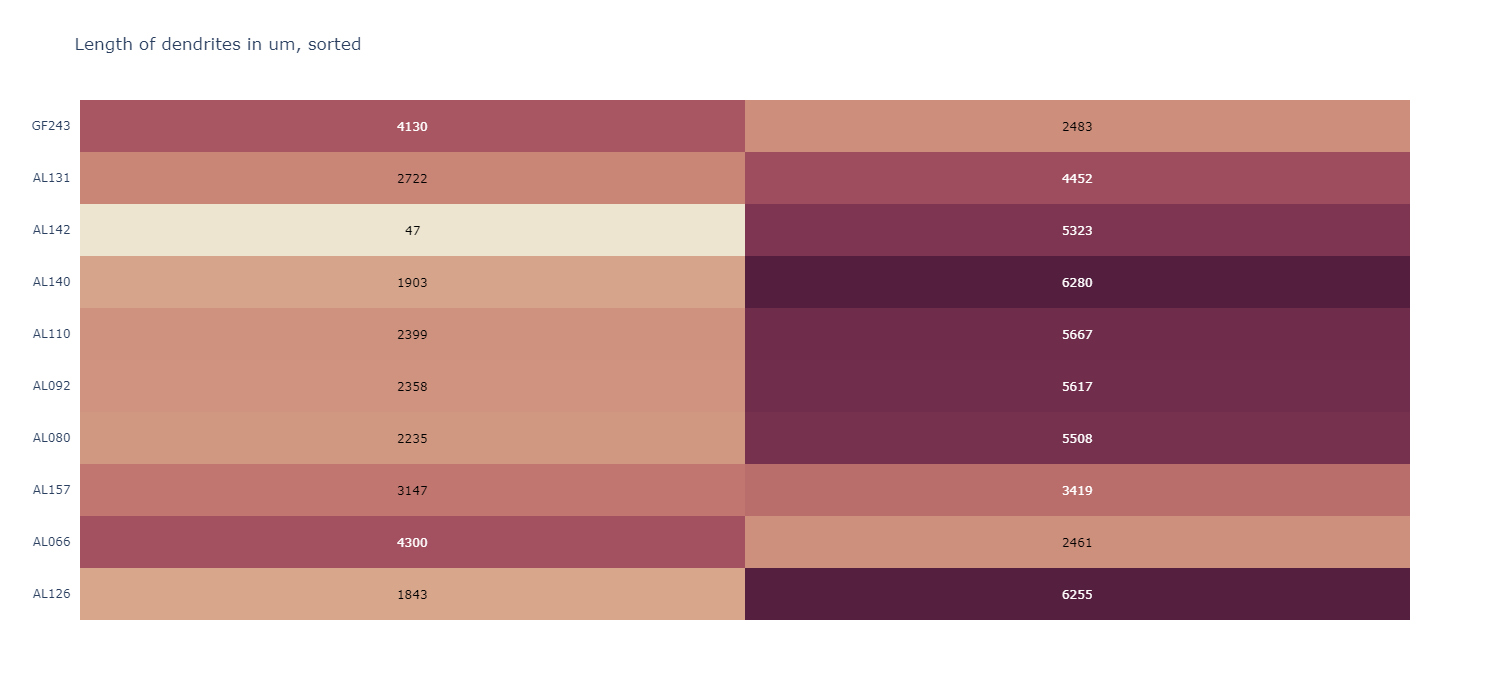

In [45]:
dendrite_df.drop(['cluster'],axis=1,inplace=True)
z =dendrite_df.values

fig = ff.create_annotated_heatmap(z, colorscale='Brwnyl',
                                  x=str_id,y=list(dendrite_df.index))
fig.update_xaxes(showticklabels=False,
                type='category')

fig.update_layout(
    title='Length of dendrites in um, sorted',
    width = 700, height = 700,
    autosize = True
)

fig.show()


In [72]:
y=dendrite_df.index
list(y)

['AL066',
 'AL080',
 'AL092',
 'AL110',
 'AL126',
 'AL131',
 'AL140',
 'AL142',
 'AL157',
 'GF243']

In [27]:
#pick out those present in the axonal df and find its graph order
atlas_ref=na.atlas_labels[na.atlas_labels['id'].isin(axonal_df_inner.columns)]
sorted_id=[x for _,x in sorted(zip(atlas_ref['graph_order'],atlas_ref['id']))]
sorted_id

[981, 201, 1047, 1070, 1038]

In [55]:
na.atlas_labels[na.atlas_labels['id'].isin(axonal_df_inner.columns)]

id  atlas_id                                               name  \
51    1047     979.0  Primary somatosensory area, barrel field, layer 4   
403   1038     978.0  Primary somatosensory area, barrel field, laye...   
1039   201    1015.0  Primary somatosensory area, barrel field, laye...   
1114   981     971.0  Primary somatosensory area, barrel field, layer 1   
1299  1070     982.0  Primary somatosensory area, barrel field, layer 5   

         acronym  st_level  ontology_id  hemisphere_id  weight  \
51      SSp-bfd4        11            1              3    8690   
403    SSp-bfd6a        11            1              3    8690   
1039  SSp-bfd2/3        11            1              3    8690   
1114    SSp-bfd1        11            1              3    8690   
1299    SSp-bfd5        11            1              3    8690   

      parent_structure_id  depth  ...  graph_order  \
51                  329.0      9  ...           54   
403                 329.0      9  ...           56   
1039                329.0      9  ...           53   
1114                329.0      9  ...           52   
1299                329.0      9  ...           55   

                             structure_id_path color_hex_triplet  \
51    /997/8/567/688/695/315/453/322/329/1047/            188064   
403   /997/8/567/688/695/315/453/322/329/1038/            188064   
1039   /997/8/567/688/695/315/453/322/329/201/            188064   
1114   /997/8/567/688/695/315/453/322/329/981/            188064   
1299  /997/8/567/688/695/315/453/322/329/1070/            188064   

     neuro_name_structure_id  neuro_name_structure_id_path  failed sphinx_id  \
51                       NaN                           NaN       f        55   
403                      NaN                           NaN       f        57   
1039                     NaN                           NaN       f        54   
1114                     NaN                           NaN       f        53   
1299                     NaN                           NaN       f        56   

      structure_name_facet  failed_facet  \
51              3439709501     734881840   
403             2183435549     734881840   
1039            1738869888     734881840   
1114            3178183090     734881840   
1299            3120758187     734881840   

                                              safe_name  
51      Primary somatosensory area barrel field layer 4  
403    Primary somatosensory area barrel field layer 6a  
1039  Primary somatosensory area barrel field layer 2/3  
1114    Primary somatosensory area barrel field layer 1  
1299    Primary somatosensory area barrel field layer 5  

[5 rows x 21 columns]

In [11]:
read_file= pd.read_excel('M:\\analysis\Yanqi_Liu\Complete_points\AL066axons_region_with_counts.xls')
new= read_file.set_index('id').sort_values(by='graph_order').T
new_series=new.loc['Total_counts']

full_df= new_series.to_frame()
full_df.rename(columns={'Total_counts': find_mousename('AL066axons_region_with_counts.xls')}, inplace=1)

In [12]:
full_df

AL066
id              
981         8931
201        13512
1047        8551
1070       21207
1038         914
1062         582
670          454
1086         409
1111         963
873          173
806           37
1035         141
1090         407
600          481
678          177
252          126
696          343
643          158
1074         908
905         1623
1114         596
233          780
281          155
1066        3306
401          170
433          972
1046         684
33          1233
805          103
41           973
501          190
565          116
257          297
687            5
312782624   1775
971          770
986         4228
940         1158
466           47
443          289
484682528   1110

In [20]:
axonal_files= [i for i in files if 'axons' in i]
axonal_df= combine_df(folder, axonal_files[0:1])
axonal_df

id    981       201       1047      1070      1038      1062      670        \
AL066      8931     13512      8551     21207       914       582       454   

id    1086      1111      873        ... 565       257       687        \
AL066       409       963       173  ...       116       297         5   

id    312782624 971       986       940       466       443       484682528  
AL066      1775       770      4228      1158        47       289      1110  

[1 rows x 41 columns]

In [15]:
axonal_df

id    9         33        41        113       201       233       243        \
AL066       NaN      1233       973       NaN     13512       780       NaN   
AL080       NaN       NaN       NaN       NaN     13548       NaN       NaN   
AL092       NaN       NaN       NaN       NaN     17523       781       NaN   
AL110       NaN       NaN       NaN       NaN     14040       NaN       NaN   
AL126      1445       NaN       NaN       NaN     10995       NaN       NaN   
AL131        75       NaN       NaN       NaN     16591       237       NaN   
AL140       NaN       NaN       NaN       NaN      9330       428       589   
AL142       NaN       NaN       NaN       NaN      1395       NaN       NaN   
AL157       NaN       NaN       NaN       238     12176       NaN       NaN   
GF243       532       NaN       NaN       NaN     14394       NaN       NaN   

id    252       257       281        ... 1085      1086      1090       \
AL066       126       297       155  ...       NaN       409       407   
AL080       NaN       NaN       NaN  ...       NaN       NaN      1294   
AL092        51       NaN       NaN  ...       NaN       NaN       966   
AL110       NaN       NaN       NaN  ...       NaN       NaN      2153   
AL126       NaN       NaN       NaN  ...        92       NaN       NaN   
AL131       NaN       NaN       NaN  ...       NaN       101       NaN   
AL140       NaN       NaN       NaN  ...       NaN       NaN        18   
AL142       NaN       NaN       NaN  ...       NaN       NaN       NaN   
AL157       NaN       NaN       NaN  ...       NaN       NaN       NaN   
GF243       NaN       NaN       NaN  ...       NaN       381       NaN   

id    1094      1111      1114      1128      312782624 484682496 484682528  
AL066       NaN       963       596       NaN      1775       NaN      1110  
AL080       NaN       NaN       NaN       NaN      4494        81      1043  
AL092       114      1088       269       NaN      2873       NaN       NaN  
AL110       NaN        20       NaN       NaN       NaN       461       NaN  
AL126       NaN       686       NaN       NaN       NaN       NaN       NaN  
AL131       NaN       NaN       230       NaN       674      1175      5059  
AL140       NaN       NaN       NaN       456      2170       251      3589  
AL142       NaN       NaN       NaN       NaN       NaN      1218      1791  
AL157       NaN       196       NaN       NaN       NaN       839      5821  
GF243       NaN      2001       NaN       NaN       NaN       983       473  

[10 rows x 75 columns]